In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load raw dataset
raw_df = pd.read_csv("3ae033f50fa345051652.csv")

# Preview first few rows
raw_df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [3]:
# Check column names, types, and missing values
raw_df.info()

# Check number of missing values per column
raw_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [4]:
# Drop columns with all missing values
raw_df.dropna(axis=1, how='all', inplace=True)

In [5]:
# Fill specific columns with default
if 'Brand' in raw_df.columns:
    raw_df['Brand'].fillna('Unknown', inplace=True)

if 'Price' in raw_df.columns:
    raw_df['Price'].fillna(raw_df['Price'].mean(), inplace=True)

raw_df.dropna(thresh=5, inplace=True) 

In [6]:
# Convert price column to numeric (remove ₹ and commas if needed)
if 'Price' in raw_df.columns:
    raw_df['Price'] = raw_df['Price'].replace('[₹,]', '', regex=True).astype(float)

# Convert Date column
# raw_df['Launch_Date'] = pd.to_datetime(raw_df['Launch_Date'])

In [7]:
raw_df.to_csv("ev_data_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'ev_data_cleaned.csv'")

✅ Cleaned dataset saved as 'ev_data_cleaned.csv'


In [8]:
# Week 2 - Advanced EDA & Visualization
# EV Charging Demand Prediction Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For date formatting
import matplotlib.dates as mdates

# Set plot style
sns.set(style="whitegrid")

In [9]:
df = pd.read_csv("ev_data_cleaned.csv")
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

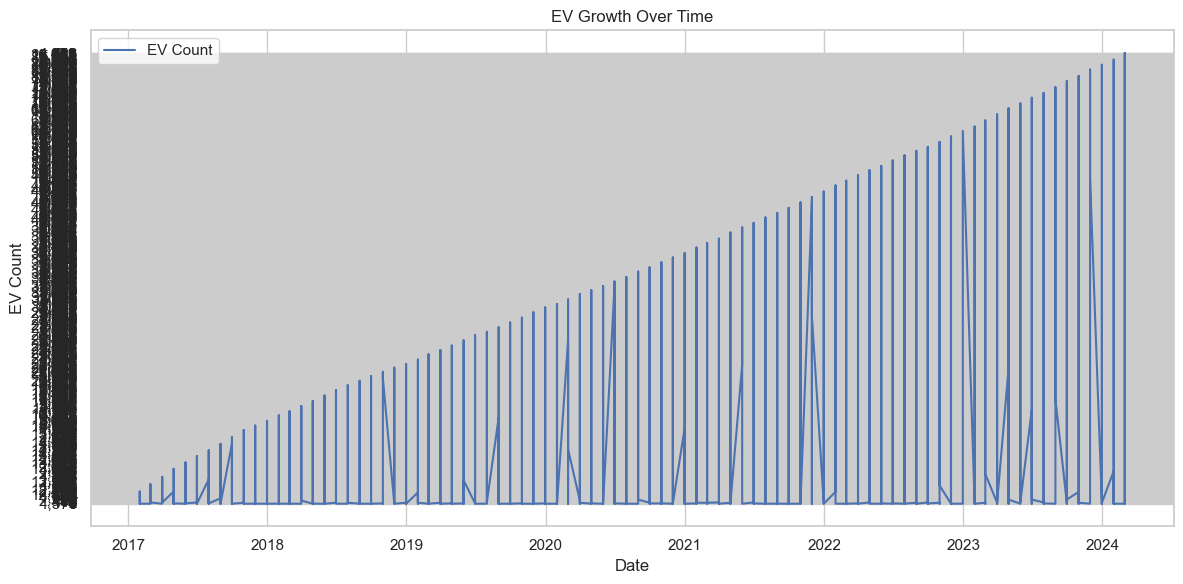

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Electric Vehicle (EV) Total'], label='EV Count')
plt.title('EV Growth Over Time')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.tight_layout()
plt.savefig("Week2_Images/ev_count_over_time.png")
plt.show()

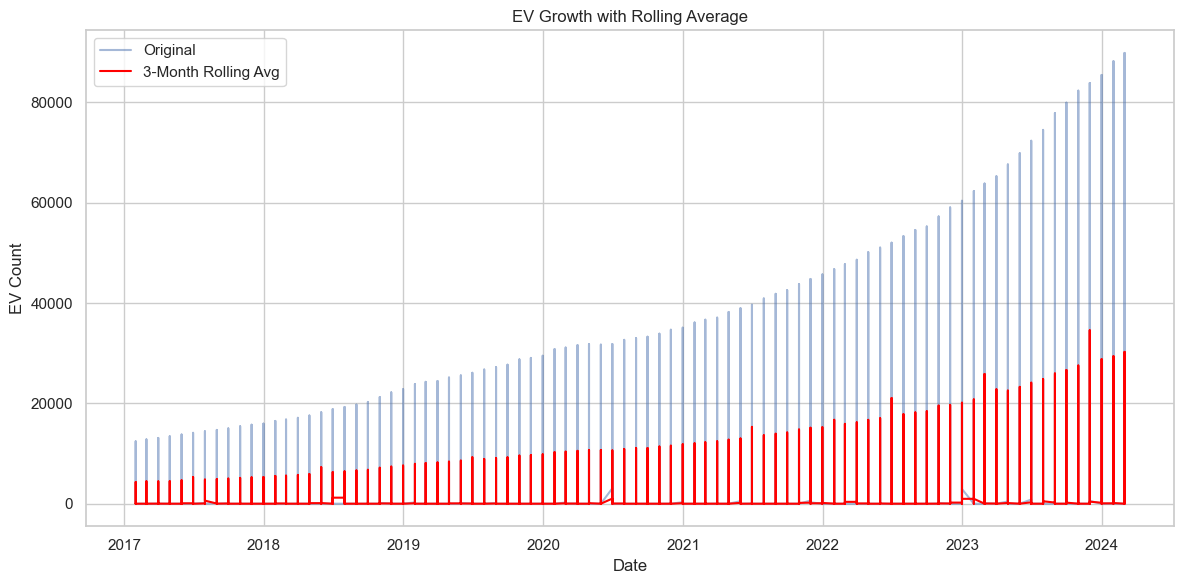

In [13]:
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].str.replace(',', '', regex=False)
df['Electric Vehicle (EV) Total'] = pd.to_numeric(df['Electric Vehicle (EV) Total'], errors='coerce')
df['EV_Rolling'] = df['Electric Vehicle (EV) Total'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Electric Vehicle (EV) Total'], label='Original', alpha=0.5)
plt.plot(df.index, df['EV_Rolling'], label='3-Month Rolling Avg', color='red')
plt.title('EV Growth with Rolling Average')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.tight_layout()
plt.savefig("Week2_Images/ev_growth_rolling.png")
plt.show()

C:\Users\Mr\AppData\Local\Temp\ipykernel_11704\2111177740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='mako')


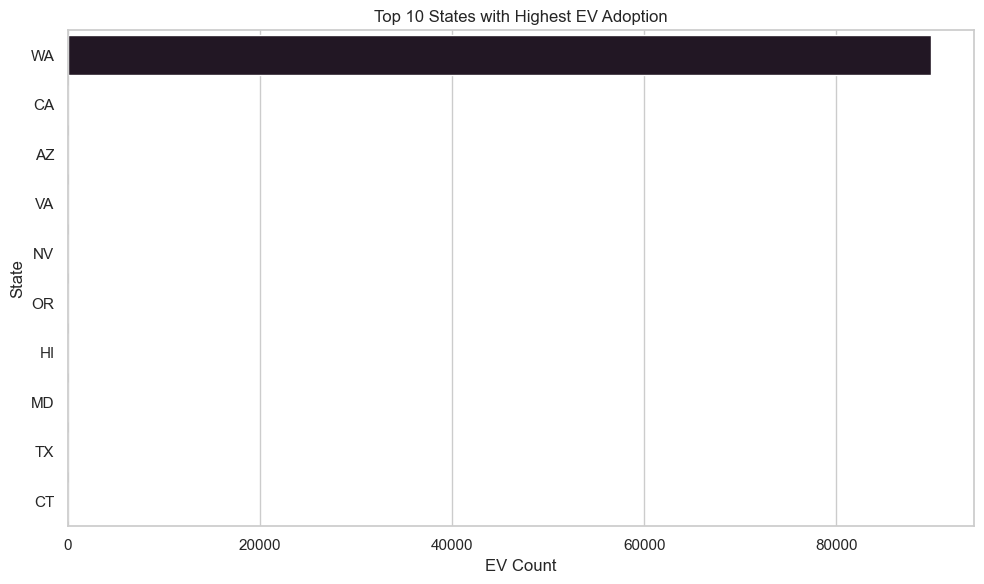

In [14]:
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette='mako')
plt.title('Top 10 States with Highest EV Adoption')
plt.xlabel('EV Count')
plt.tight_layout()
plt.savefig("Week2_Images/top_states_ev.png")
plt.show()

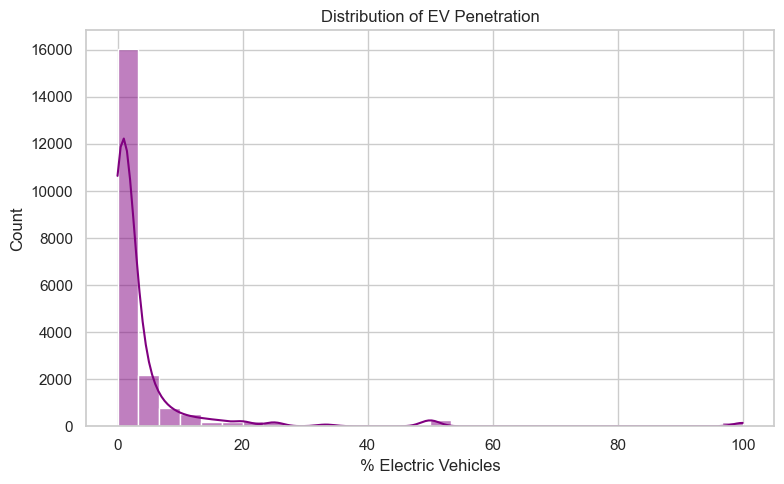

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Percent Electric Vehicles'], bins=30, kde=True, color='purple')
plt.title('Distribution of EV Penetration')
plt.xlabel('% Electric Vehicles')
plt.tight_layout()
plt.savefig("Week2_Images/ev_percent_distribution.png")
plt.show()

In [16]:
print(df.columns)

Index(['County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles', 'EV_Rolling'],
      dtype='object')


C:\Users\Mr\AppData\Local\Temp\ipykernel_11704\1545758950.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


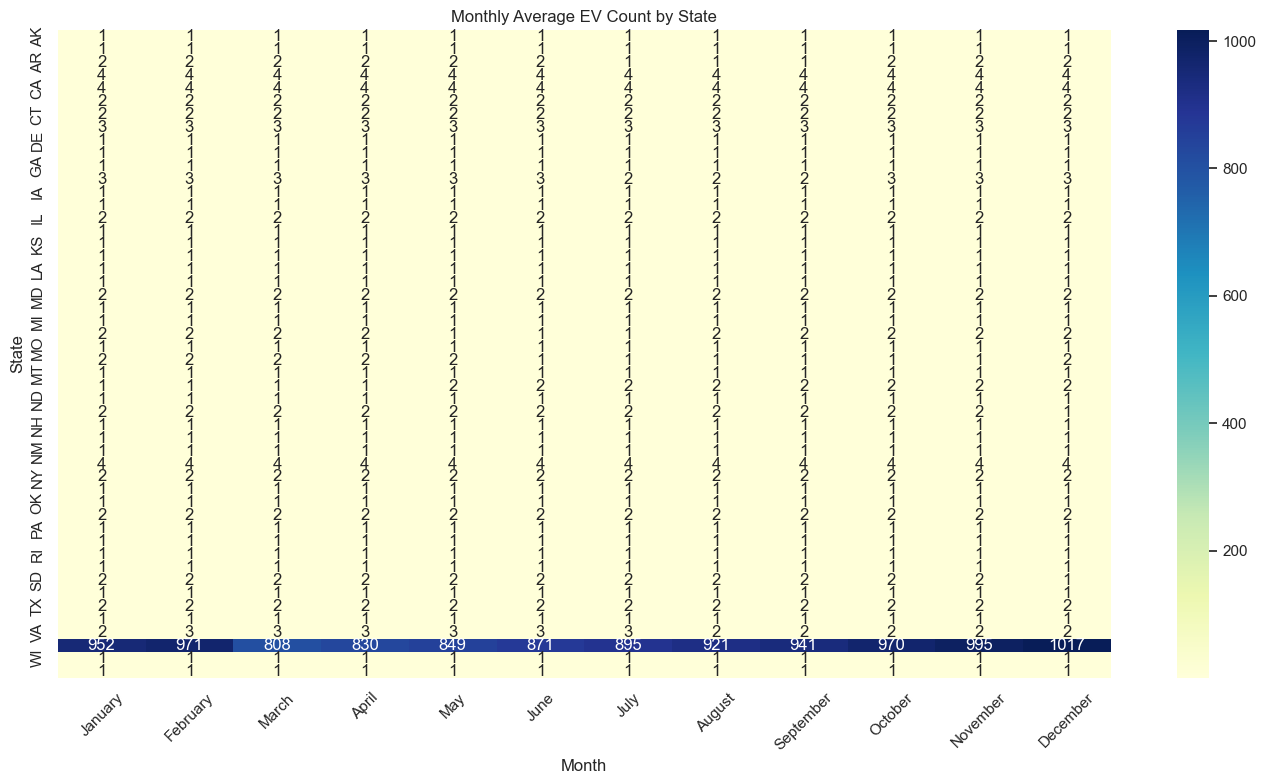

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ev_data_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].replace(',', '', regex=True).astype(float)

# Create pivot table
pivot_table = df.pivot_table(
    values='Electric Vehicle (EV) Total',
    index='State',
    columns='Month',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly Average EV Count by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Week2_Images/state_month_heatmap.png") 
plt.show()

In [19]:
# Convert both columns from string to float
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].replace(',', '', regex=True).astype(float)
df['Total Vehicles'] = df['Total Vehicles'].replace(',', '', regex=True).astype(float)


df['Percent Electric Vehicles'] = (df['Electric Vehicle (EV) Total'] / df['Total Vehicles']) * 100

C:\Users\Mr\AppData\Local\Temp\ipykernel_11704\25068585.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['State'].isin(top_states_list)],


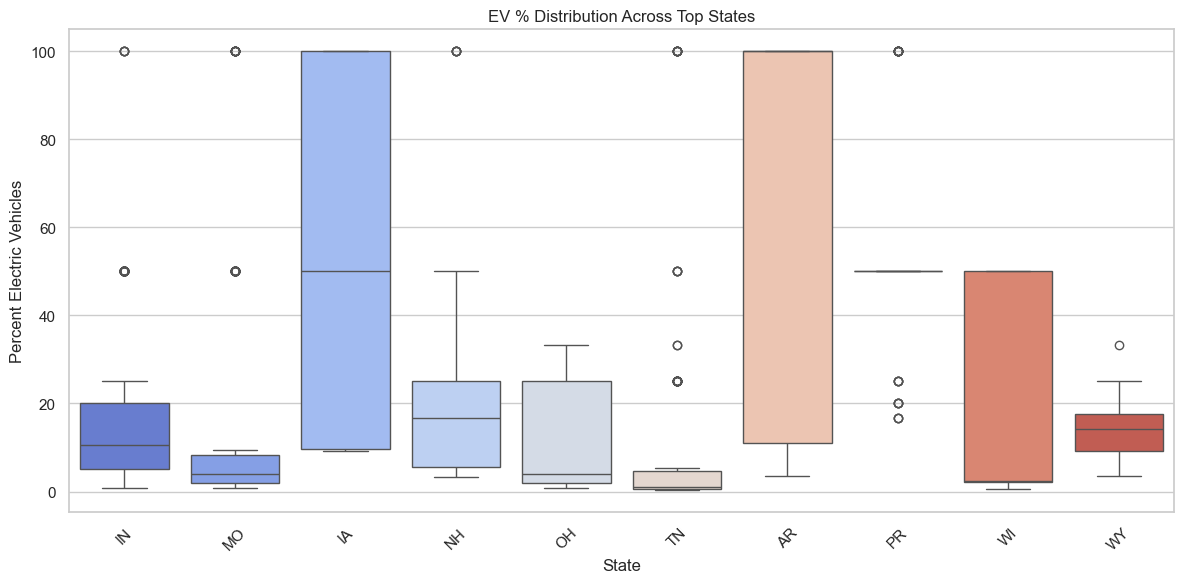

In [20]:
# Group by state and compute average EV %
state_avg = df.groupby('State')['Percent Electric Vehicles'].mean().sort_values(ascending=False)

# Select top 10 states
top_states = state_avg.head(10)
top_states_list = top_states.index.tolist()

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['State'].isin(top_states_list)],
            x='State',
            y='Percent Electric Vehicles',
            palette='coolwarm')
plt.title('EV % Distribution Across Top States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Week2_Images/ev_percent_boxplot.png")
plt.show()

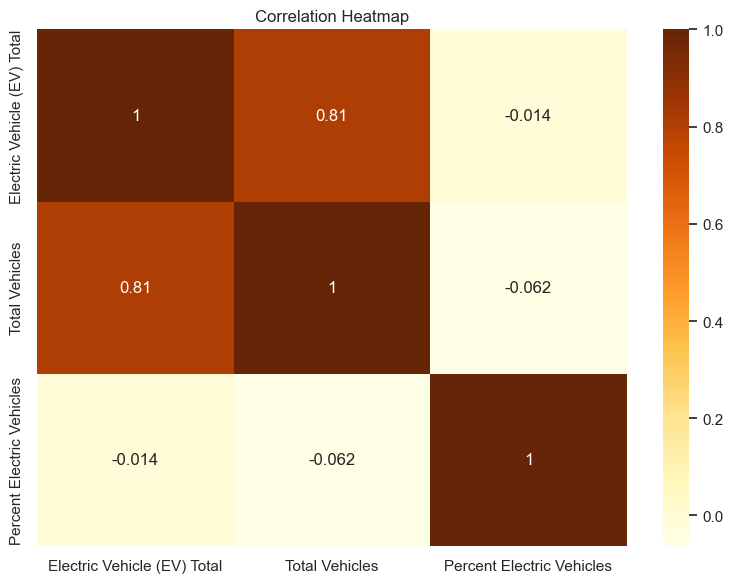

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("Week2_Images/correlation_heatmap.png")
plt.show()